In [1]:
#pip install TextBlob

In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
import psycopg2
import pyodbc


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [4]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_dbSentimentData = SqlConn.fetchTweetFinance()
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
df_dbSentimentData[(df_dbSentimentData['tweetID'] == 1531497809421139973)]

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume


In [6]:
df_dbSentimentData

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,1000098080857907200,tesla,2018-05-25,"Pravda was incorporated a year ago. Also, Tesl...",53.0,1077,42,55.770000,19375500.0
1,1000204113953439744,tesla,2018-05-25,"Global map of Tesla Superchargers, including t...",2391.0,21663,2425,55.770000,19375500.0
2,1000208369959845889,tesla,2018-05-25,Tesla will start extending the Supercharger ne...,67.0,981,94,55.770000,19375500.0
3,1000332404618227712,tesla,2018-05-26,Can’t believe someone leaked this schematic of...,887.0,41981,3615,NaN,NaN
4,1000431923502530560,tesla,2018-05-26,"Generally higher quality reporting, especially...",54.0,1598,68,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1513,999385249720057856,tesla,2018-05-23,I’ve never stopped a union vote nor removed a ...,80.0,2060,151,55.813999,29925500.0
1514,999466717112745985,tesla,2018-05-23,"Hi Kara! I’m open to it. Right now, I’m cranki...",207.0,4906,217,55.813999,29925500.0
1515,999797465787191297,tesla,2018-05-24,"Yes, because Tesla has the most advanced batte...",98.0,2810,152,55.570000,20883500.0
1516,999841559846633473,tesla,2018-05-24,The Tesla facility is open plan &amp; we’re no...,50.0,903,42,55.570000,20883500.0


In [7]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
#df_doge = pd.read_csv('../Data_Resources/scrapped_data/doge_tweets.csv')
#df_spaceX = pd.read_csv('../Data_Resources/scrapped_data/spaceX_tweets.csv')
#df_tesla = pd.read_csv('../Data_Resources/scrapped_data/tesla_tweets.csv')
#df_twitter = pd.read_csv('../Data_Resources/scrapped_data/twitter_tweets.csv')

In [8]:
df_doge = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'doge']
df_tesla = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'tesla']
df_twitter = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'twitter']

In [9]:
df_doge

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
274,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,6.029836e+07
275,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,6.029836e+07
276,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,6.029836e+07
520,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,2.298104e+08
581,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,7.470537e+07
...,...,...,...,...,...,...,...,...,...
1092,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",NaN,202883,19421,0.081335,1.310058e+09
1109,1531696049064116225,doge,2022-05-31,And Palmer always forgets to mention that he n...,NaN,3649,309,0.085865,6.724446e+08
1110,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12139,1224,0.085865,6.724446e+08
1124,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,NaN,395787,37200,0.060396,1.166164e+09


In [10]:
print(f"shape of doge df: " + str(df_doge.shape))
print(f"shape of tesla df: " + str(df_tesla.shape))
print(f"shape of twitter df: " + str(df_twitter.shape))

shape of doge df: (75, 9)
shape of tesla df: (1309, 9)
shape of twitter df: (134, 9)


In [11]:
df_doge.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
274,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0
275,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0
276,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0
520,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0
581,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0


In [12]:
df_tesla.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,1000098080857907200,tesla,2018-05-25,"Pravda was incorporated a year ago. Also, Tesl...",53.0,1077,42,55.77,19375500.0
1,1000204113953439744,tesla,2018-05-25,"Global map of Tesla Superchargers, including t...",2391.0,21663,2425,55.77,19375500.0
2,1000208369959845889,tesla,2018-05-25,Tesla will start extending the Supercharger ne...,67.0,981,94,55.77,19375500.0
3,1000332404618227712,tesla,2018-05-26,Can’t believe someone leaked this schematic of...,887.0,41981,3615,NaN,NaN
4,1000431923502530560,tesla,2018-05-26,"Generally higher quality reporting, especially...",54.0,1598,68,NaN,NaN


In [13]:
df_twitter.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
8,1000503343007989761,twitter,2018-05-26,Because Twitter is fun,238.0,30121,2069,NaN,NaN
14,1002982393467158528,twitter,2018-06-02,Twitter is so dark …,68.0,3609,200,NaN,NaN
17,1004081880340168704,twitter,2018-06-05,Congratulations Good move by Please use Matt’s...,26.0,1685,53,39.799999,66122200.0
25,1005899053551370240,twitter,2018-06-10,The actual amount of time I spend on Twitter i...,62.0,1347,133,NaN,NaN
66,1016944210753347585,twitter,2018-07-11,I think the person who attacked me on Twitter ...,134.0,5413,195,43.869999,35100100.0


# Vader Sentiment Analyzer

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tamie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
vader = SentimentIntensityAnalyzer()

In [16]:
df_doge_vader = df_doge.copy()
df_tesla_vader = df_tesla.copy()
df_twitter_vader = df_twitter.copy()

In [17]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_doge_vader["compound_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_doge_vader["negative_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_doge_vader["neutral_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_doge_vader["positive_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_doge_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
274,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.0,0.414,0.586
275,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.0,1.000,0.000
276,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.0,0.556,0.444
520,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.0,1.000,0.000
581,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.0,0.715,0.285


In [18]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_tesla_vader["compound_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_tesla_vader["negative_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_tesla_vader["neutral_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_tesla_vader["positive_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_tesla_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,1000098080857907200,tesla,2018-05-25,"Pravda was incorporated a year ago. Also, Tesl...",53.0,1077,42,55.77,19375500.0,0.4588,0.122,0.693,0.185
1,1000204113953439744,tesla,2018-05-25,"Global map of Tesla Superchargers, including t...",2391.0,21663,2425,55.77,19375500.0,0.0000,0.000,1.000,0.000
2,1000208369959845889,tesla,2018-05-25,Tesla will start extending the Supercharger ne...,67.0,981,94,55.77,19375500.0,0.0000,0.000,1.000,0.000
3,1000332404618227712,tesla,2018-05-26,Can’t believe someone leaked this schematic of...,887.0,41981,3615,NaN,NaN,-0.4374,0.224,0.776,0.000
4,1000431923502530560,tesla,2018-05-26,"Generally higher quality reporting, especially...",54.0,1598,68,NaN,NaN,0.7641,0.065,0.682,0.253


In [19]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_twitter_vader["compound_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_twitter_vader["negative_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_twitter_vader["neutral_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_twitter_vader["positive_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_twitter_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
8,1000503343007989761,twitter,2018-05-26,Because Twitter is fun,238.0,30121,2069,NaN,NaN,0.5106,0.000,0.476,0.524
14,1002982393467158528,twitter,2018-06-02,Twitter is so dark …,68.0,3609,200,NaN,NaN,0.0000,0.000,1.000,0.000
17,1004081880340168704,twitter,2018-06-05,Congratulations Good move by Please use Matt’s...,26.0,1685,53,39.799999,66122200.0,0.9001,0.000,0.429,0.571
25,1005899053551370240,twitter,2018-06-10,The actual amount of time I spend on Twitter i...,62.0,1347,133,NaN,NaN,-0.3887,0.111,0.889,0.000
66,1016944210753347585,twitter,2018-07-11,I think the person who attacked me on Twitter ...,134.0,5413,195,43.869999,35100100.0,-0.4588,0.231,0.769,0.000


### Sentiment Analysis by TextBlob

In [20]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
#Make a copy of the df_doge df
df_doge_txtblb = df_doge.copy()

# Create 2 new columns
df_doge_txtblb["subjectivity"] = df_doge_txtblb["fullText"].apply(getSubjectivity)
df_doge_txtblb["polarity"] = df_doge_txtblb["fullText"].apply(getPolarity)
df_doge_txtblb['Sentiment'] = df_doge_txtblb['polarity'].apply(getAnalysis)
df_doge_txtblb.head()
df_doge_txtblb.to_csv("filename.csv")

In [22]:
df_doge_txtblb["Sentiment"].value_counts()

Neutral     47
Positive    22
Negative     6
Name: Sentiment, dtype: int64

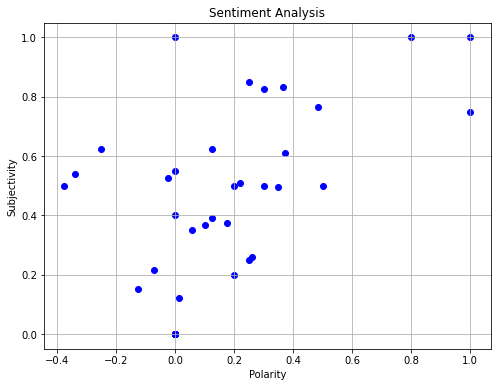

In [23]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge_txtblb["polarity"],df_doge_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [24]:
#Make a copy of the df_tesla df
df_tesla_txtblb = df_tesla.copy()

# Create 2 new columns
df_tesla_txtblb["subjectivity"] = df_tesla_txtblb["fullText"].apply(getSubjectivity)
df_tesla_txtblb["polarity"] = df_tesla_txtblb["fullText"].apply(getPolarity)
df_tesla_txtblb['Sentiment'] = df_tesla_txtblb['polarity'].apply(getAnalysis)
df_tesla_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
0,1000098080857907200,tesla,2018-05-25,"Pravda was incorporated a year ago. Also, Tesl...",53.0,1077,42,55.77,19375500.0,0.550000,0.050,Positive
1,1000204113953439744,tesla,2018-05-25,"Global map of Tesla Superchargers, including t...",2391.0,21663,2425,55.77,19375500.0,0.000000,0.000,Neutral
2,1000208369959845889,tesla,2018-05-25,Tesla will start extending the Supercharger ne...,67.0,981,94,55.77,19375500.0,0.000000,0.000,Neutral
3,1000332404618227712,tesla,2018-05-26,Can’t believe someone leaked this schematic of...,887.0,41981,3615,NaN,NaN,0.000000,0.000,Neutral
4,1000431923502530560,tesla,2018-05-26,"Generally higher quality reporting, especially...",54.0,1598,68,NaN,NaN,0.708333,0.325,Positive


In [25]:
df_tesla_txtblb["Sentiment"].value_counts()

Positive    773
Neutral     332
Negative    204
Name: Sentiment, dtype: int64

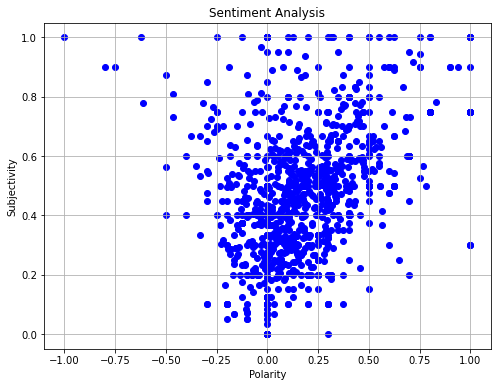

In [26]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_tesla_txtblb["polarity"],df_tesla_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [27]:
#Make a copy of the df_twitter df
df_twitter_txtblb = df_twitter.copy()

# Create 2 new columns
df_twitter_txtblb["subjectivity"] = df_twitter_txtblb["fullText"].apply(getSubjectivity)
df_twitter_txtblb["polarity"] = df_twitter_txtblb["fullText"].apply(getPolarity)
df_twitter_txtblb['Sentiment'] = df_twitter_txtblb['polarity'].apply(getAnalysis)
df_twitter_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
8,1000503343007989761,twitter,2018-05-26,Because Twitter is fun,238.0,30121,2069,NaN,NaN,0.200000,0.300000,Positive
14,1002982393467158528,twitter,2018-06-02,Twitter is so dark …,68.0,3609,200,NaN,NaN,0.400000,-0.150000,Negative
17,1004081880340168704,twitter,2018-06-05,Congratulations Good move by Please use Matt’s...,26.0,1685,53,39.799999,66122200.0,0.600000,0.700000,Positive
25,1005899053551370240,twitter,2018-06-10,The actual amount of time I spend on Twitter i...,62.0,1347,133,NaN,NaN,0.342857,-0.021429,Negative
66,1016944210753347585,twitter,2018-07-11,I think the person who attacked me on Twitter ...,134.0,5413,195,43.869999,35100100.0,0.000000,0.000000,Neutral


In [28]:
df_twitter_txtblb["Sentiment"].value_counts()

Positive    74
Neutral     40
Negative    20
Name: Sentiment, dtype: int64

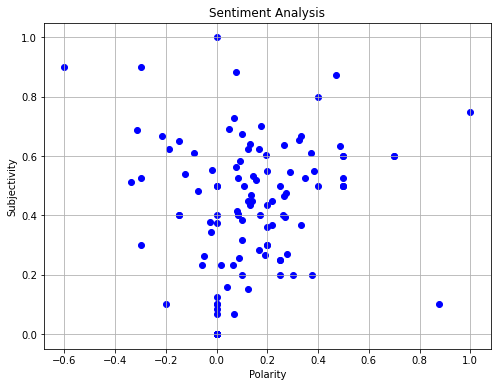

In [29]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_twitter_txtblb["polarity"],df_twitter_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [30]:
df_dbSentimentData_Combine = pd.concat([df_doge_vader,df_tesla_vader,df_twitter_vader],ignore_index=False)
df_dbSentimentData_Combine.rename(columns = {'Sentiment':'sentiment','compound_sc':'sentimentScore'} ,inplace=True)

In [31]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
274,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.0,0.414,0.586
275,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.0,1.000,0.000
276,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.0,0.556,0.444
520,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.0,1.000,0.000
581,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.0,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,893985049569185792,twitter,2017-08-05,And let's not forget the forum on which we are...,22.0,884,66,NaN,NaN,0.1695,0.0,0.935,0.065
1456,943901463998169088,twitter,2017-12-21,I love Twitter,5637.0,169609,31496,25.049999,19597700.0,0.6369,0.0,0.192,0.808
1478,992354361975042048,twitter,2018-05-04,They were neither valid nor pertinent. I will ...,21.0,536,25,31.040001,21035200.0,0.0000,0.0,1.000,0.000
1510,999365292684861441,twitter,2018-05-23,"Uh, this is Twitter. How many characters do yo...",87.0,3783,114,33.419998,13442700.0,0.0772,0.0,0.874,0.126


In [32]:
df_sentiment_tostore = df_dbSentimentData_Combine[["tweetID","date","adjustedClose","volume","sentimentScore"]]

In [33]:
#Insert Sentiment data
try:
    SqlConn.insertSentiment(df_sentiment_tostore)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [34]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
274,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.0,0.414,0.586
275,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.0,1.000,0.000
276,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.0,0.556,0.444
520,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.0,1.000,0.000
581,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.0,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,893985049569185792,twitter,2017-08-05,And let's not forget the forum on which we are...,22.0,884,66,NaN,NaN,0.1695,0.0,0.935,0.065
1456,943901463998169088,twitter,2017-12-21,I love Twitter,5637.0,169609,31496,25.049999,19597700.0,0.6369,0.0,0.192,0.808
1478,992354361975042048,twitter,2018-05-04,They were neither valid nor pertinent. I will ...,21.0,536,25,31.040001,21035200.0,0.0000,0.0,1.000,0.000
1510,999365292684861441,twitter,2018-05-23,"Uh, this is Twitter. How many characters do yo...",87.0,3783,114,33.419998,13442700.0,0.0772,0.0,0.874,0.126
